In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [4]:
X = np.linspace(10,100,100)

In [20]:
X

array([ 10.        ,  10.90909091,  11.81818182,  12.72727273,
        13.63636364,  14.54545455,  15.45454545,  16.36363636,
        17.27272727,  18.18181818,  19.09090909,  20.        ,
        20.90909091,  21.81818182,  22.72727273,  23.63636364,
        24.54545455,  25.45454545,  26.36363636,  27.27272727,
        28.18181818,  29.09090909,  30.        ,  30.90909091,
        31.81818182,  32.72727273,  33.63636364,  34.54545455,
        35.45454545,  36.36363636,  37.27272727,  38.18181818,
        39.09090909,  40.        ,  40.90909091,  41.81818182,
        42.72727273,  43.63636364,  44.54545455,  45.45454545,
        46.36363636,  47.27272727,  48.18181818,  49.09090909,
        50.        ,  50.90909091,  51.81818182,  52.72727273,
        53.63636364,  54.54545455,  55.45454545,  56.36363636,
        57.27272727,  58.18181818,  59.09090909,  60.        ,
        60.90909091,  61.81818182,  62.72727273,  63.63636364,
        64.54545455,  65.45454545,  66.36363636,  67.27

In [6]:
def hypothesis(theta , X):
    return X * theta[1] + theta[0]

In [25]:
#hypothesis([50,2],X)

In [7]:

theta  = [50,2]

In [8]:
noise = np.random.randint(-3,3,len(X))

In [9]:
noise

array([ 0,  2,  1, -2,  2,  0,  2,  1, -2,  1, -2,  0, -3,  0, -1,  1,  0,
        2,  1,  0,  2, -2,  2,  0, -3,  1,  2, -3, -3,  0,  0,  1,  1,  2,
       -3, -2,  1, -1, -3,  1,  1, -1, -2, -2, -1, -2, -3, -1, -2,  1, -2,
        2, -1, -2,  2, -3, -2, -3, -1, -2,  0,  2, -3,  2,  2,  0,  2,  0,
       -2,  0,  0,  1,  2,  1, -1, -3,  2,  2, -1,  0, -2,  1,  2,  1,  1,
        1, -3, -2,  0, -2, -1, -3,  1,  0, -1,  1,  1,  1,  2, -2])

In [10]:
y = hypothesis(theta,X) + noise

In [21]:
y

array([ 70.        ,  73.81818182,  74.63636364,  73.45454545,
        79.27272727,  79.09090909,  82.90909091,  83.72727273,
        82.54545455,  87.36363636,  86.18181818,  90.        ,
        88.81818182,  93.63636364,  94.45454545,  98.27272727,
        99.09090909, 102.90909091, 103.72727273, 104.54545455,
       108.36363636, 106.18181818, 112.        , 111.81818182,
       110.63636364, 116.45454545, 119.27272727, 116.09090909,
       117.90909091, 122.72727273, 124.54545455, 127.36363636,
       129.18181818, 132.        , 128.81818182, 131.63636364,
       136.45454545, 136.27272727, 136.09090909, 141.90909091,
       143.72727273, 143.54545455, 144.36363636, 146.18181818,
       149.        , 149.81818182, 150.63636364, 154.45454545,
       155.27272727, 160.09090909, 158.90909091, 164.72727273,
       163.54545455, 164.36363636, 170.18181818, 167.        ,
       169.81818182, 170.63636364, 174.45454545, 175.27272727,
       179.09090909, 182.90909091, 179.72727273, 186.54

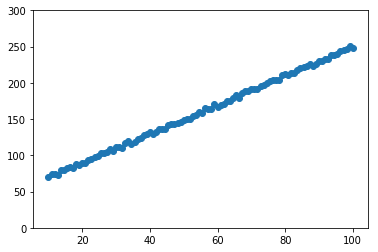

In [11]:
plt.figure()
plt.scatter(X,y)
plt.ylim(0,300)
plt.show()

In [14]:
X.shape


(100,)

In [15]:
y.shape

(100,)

In [58]:
class LinearRegression:
    
    def __init__(self, lr = 0.0001,itrs=100):
        self.lr = lr #learning rate
        self.itrs = itrs
    
    def fit(self,X,y):
        
        self.X = X
        self.y = y
        
        self.theta = np.zeros([2],dtype = float)
        
        errors = []
        
        for i in range(self.itrs):
            self.gradient_dec()
            errors.append(self.error())
            
        return errors
            
    def gradient_dec(self):
        
        yh = LinearRegression.hypothesis(self.theta,self.X)
        
        change_slope = np.sum((yh - self.y) * self.X) / len(self.X)
        change_inter = np.sum((yh - self.y)) / len(self.X)
        
        change_slope *= self.lr
        change_inter *= self.lr
        
        self.theta[0] -= change_inter
        self.theta[1] -= change_slope
        
        
    def predict(self,X):
        return LinearRegression.hypothesis(self.theta,self.X)
        
    def error(self):
        yp = LinearRegression.hypothesis(self.theta,self.X)
        return np.sum((self.y-yp)**2) /len(self.X)
        
        
    @classmethod   
    def hypothesis(cls,theta,X):
        return X * theta[1] + theta[0]

In [59]:
model = LinearRegression()

In [63]:
error = model.fit(X,y)

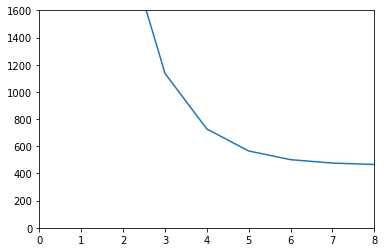

In [66]:
plt.figure()
plt.plot(error)
plt.xlim(0,8)
plt.ylim(0,1600)
plt.show()

In [47]:
yp = model.predict(X)

In [48]:
model.theta

array([0.13242846, 2.73240581])

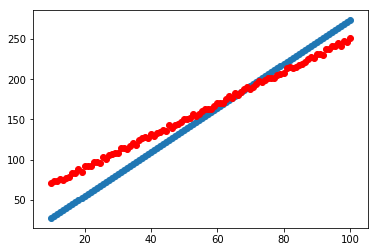

In [50]:
plt.figure()
plt.scatter(X,yp)
plt.scatter(X,y,color="red")

plt.show()